In [2]:
from google.colab import files
upload = files.upload()

Saving BlinkIT Grocery Data.xlsx to BlinkIT Grocery Data.xlsx


In [3]:
import pandas as pd
df = pd.read_excel("BlinkIT Grocery Data.xlsx")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [9]:
display(df.shape)
df.info()

(8523, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.columns  # This will list all columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [11]:
df.drop(["Item Identifier", "Outlet Identifier"], axis=1, inplace=True)

In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Item Fat Content                0
Item Type                       0
Outlet Establishment Year       0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [13]:
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())
df['Outlet Size'] = df['Outlet Size'].fillna('Missing')

In [14]:
categorical_cols = ['Item Fat Content', 'Item Type', 'Outlet Location Type', 'Outlet Size', 'Outlet Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
print("Final shape after encoding:", df_encoded.shape)


Final shape after encoding: (8523, 31)


In [16]:
df_encoded.head()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating,Item Fat Content_Low Fat,Item Fat Content_Regular,Item Fat Content_low fat,Item Fat Content_reg,Item Type_Breads,...,Item Type_Snack Foods,Item Type_Soft Drinks,Item Type_Starchy Foods,Outlet Location Type_Tier 2,Outlet Location Type_Tier 3,Outlet Size_Medium,Outlet Size_Small,Outlet Type_Supermarket Type1,Outlet Type_Supermarket Type2,Outlet Type_Supermarket Type3
0,2012,0.100014,15.10,145.4786,5.0,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2022,0.008596,11.80,115.3492,5.0,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
2,2016,0.025896,13.85,165.0210,5.0,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,2014,0.042278,12.15,126.5046,5.0,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2015,0.033970,19.60,55.1614,5.0,True,False,False,False,False,...,False,True,False,True,False,False,True,True,False,False


In [17]:
# Define X and y
X = df_encoded.drop("Sales", axis=1)
y = df_encoded["Sales"]

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (6818, 30)
Testing data shape: (1705, 30)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

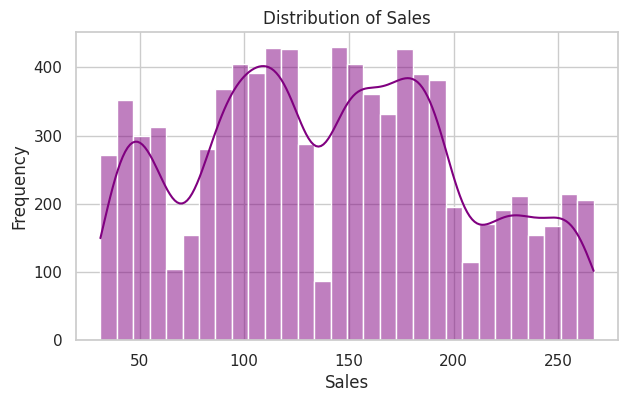

In [26]:
# 1. Distribution of Sales
plt.figure(figsize=(7, 4))
sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

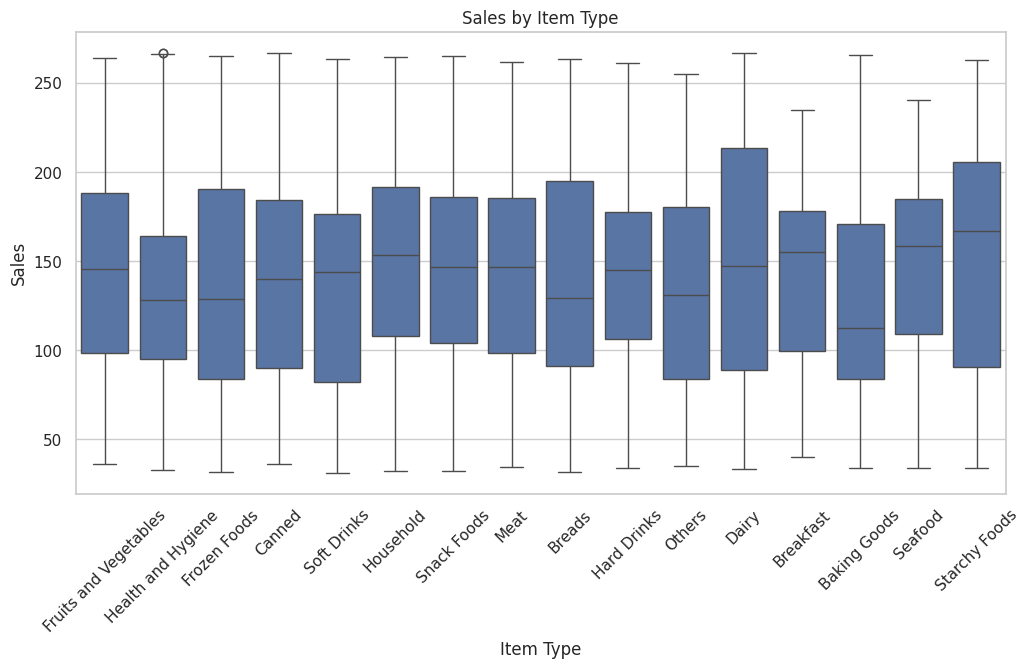

In [31]:
# 2. Sales by Item Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item Type', y='Sales', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Item Type')
plt.show()

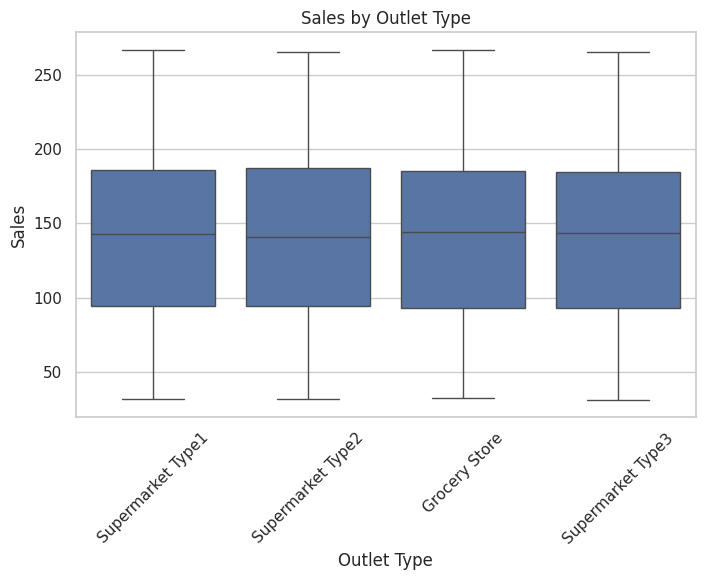

In [32]:

# 3. Sales by Outlet Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet Type', y='Sales', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Outlet Type')
plt.show()

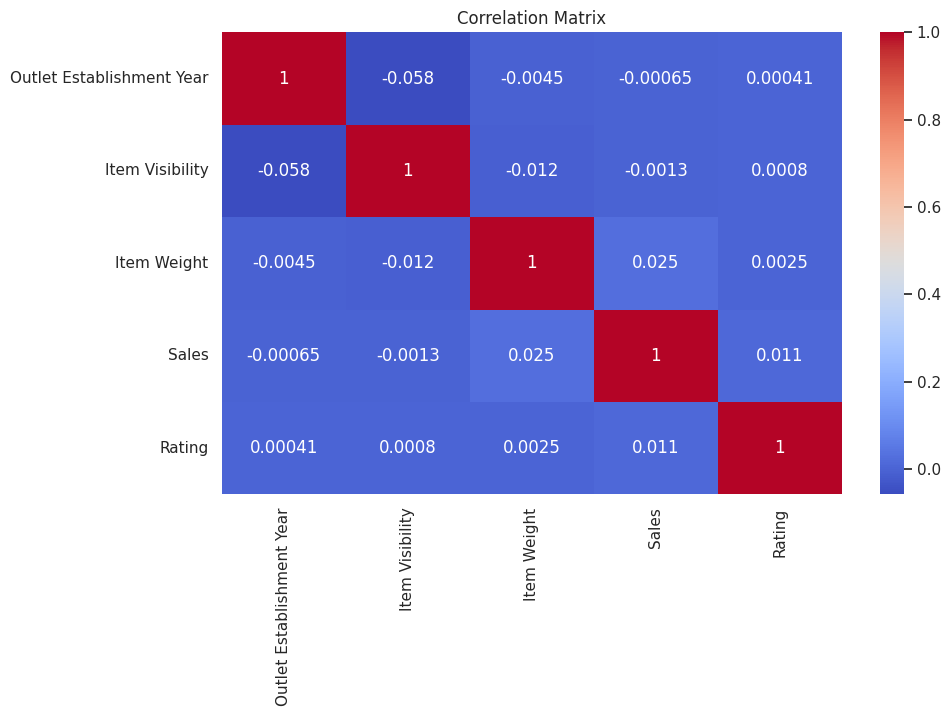

In [34]:
# 4. Correlation Heatmap (numerical features only)
import numpy as np
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

/tmp/ipython-input-873831423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


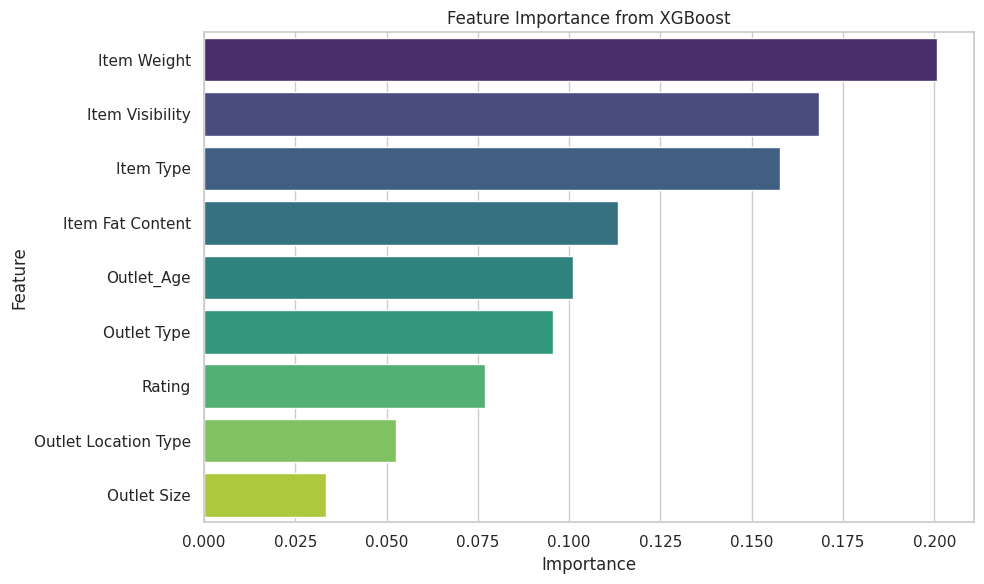

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost')
plt.tight_layout()
plt.show()

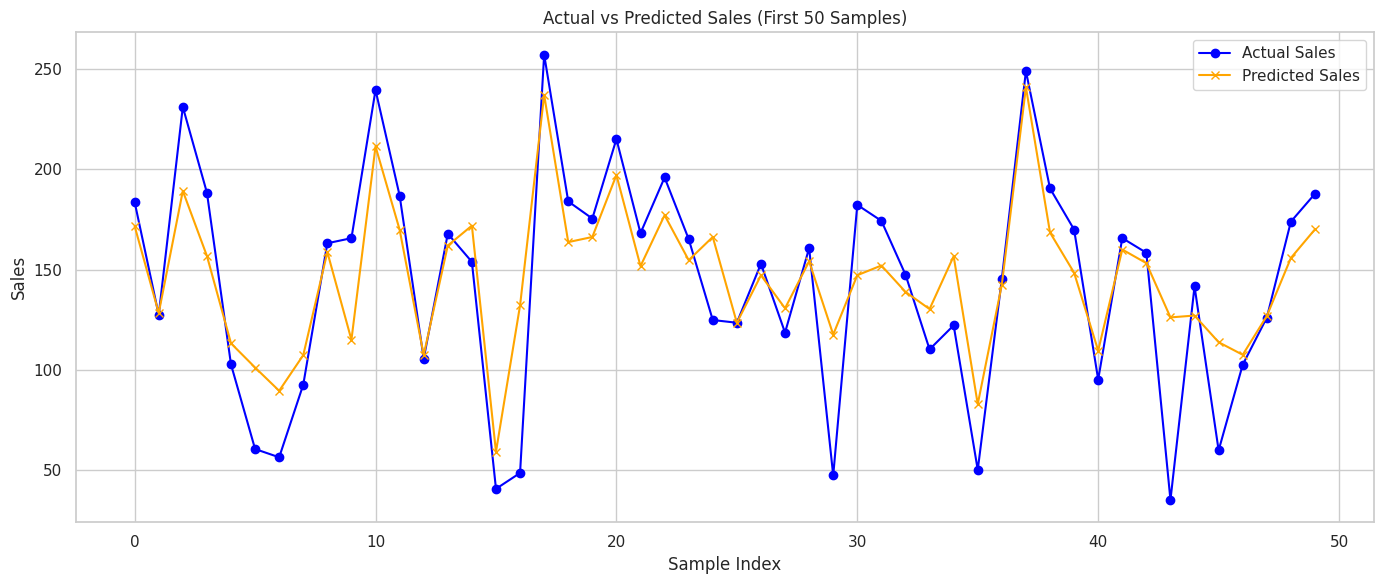

In [46]:
import matplotlib.pyplot as plt

# Select first 50 rows for visualization
sample_data = comparison_df.head(50)

# Plot line graph
plt.figure(figsize=(14, 6))
plt.plot(sample_data['Actual Sales'].values, label='Actual Sales', color='blue', marker='o')
plt.plot(sample_data['Predicted Sales'].values, label='Predicted Sales', color='orange', marker='x')

plt.title('Actual vs Predicted Sales (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


